In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import tensorflow as tf
import talib
from tensorflow import keras
from sklearn.pipeline import make_pipeline
from tensorflow.keras import regularizers

In [2]:
data=yf.download('0005.hk','2018-01-01','2022-04-09')

[*********************100%***********************]  1 of 1 completed


In [3]:
data['6day MA'] = data['Close'].rolling(window = 6).mean()
data['12day MA'] = data['Close'].rolling(window = 12).mean()
data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 7)
data['%R5'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 5)
data['%R10'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 10)
data['MI6']=talib.MOM(data['Close'],timeperiod=6)
data['MI12']=talib.MOM(data['Close'],timeperiod=12)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['EMA12']=talib.EMA(data['Close'], timeperiod=12)
data['EMA26']=talib.EMA(data['Close'],timeperiod=26)
data['MACD']=macd
data['TR']=talib.TRANGE(data['High'],data['Low'],data['Close'])
data['OSC6']=talib.CMO(data['Close'], timeperiod=6)
data['OSC12']=talib.CMO(data['Close'], timeperiod=12)
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)

In [4]:
# data=data[data.columns[list(backwardModel.k_feature_idx_)]]
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)
data_val=data[-100:]
data=data[:-100]
data_val.tail()

,Open,High,Low,Close,Adj Close,Volume,6day MA,12day MA,RSI,%R5,%R10,MI6,MI12,EMA12,EMA26,MACD,TR,OSC6,OSC12,Prediction
Date,,,,,,,,,,,,,,,,,,,,
2022-03-30,53.799999,54.450001,53.750000,53.950001,53.950001,20820331,53.308334,52.045834,69.919360,-20.833320,-10.638296,1.600002,4.350002,52.545739,52.523670,0.022069,0.950001,46.622377,18.475039,54.200001
2022-03-31,53.950001,54.299999,53.799999,54.200001,54.200001,12951991,53.483334,52.462500,71.849555,-14.285714,-6.849312,1.049999,5.000000,52.800241,52.647843,0.152398,0.500000,50.893767,20.961286,54.349998
2022-04-01,53.700001,54.349998,53.400002,54.349998,54.349998,8177523,53.758333,52.891667,73.059622,-6.060739,-2.777840,1.649998,5.149998,53.038665,52.773929,0.264737,0.949997,53.568896,22.508117,54.049999
2022-04-04,54.299999,54.349998,53.799999,54.049999,54.049999,10779509,53.966667,53.129167,66.399654,-24.242494,-12.903266,1.250000,2.849998,53.194255,52.868452,0.325803,0.549999,35.812143,17.491249,53.700001
2022-04-06,53.900002,54.049999,53.150002,53.700001,53.700001,17097274,53.958333,53.320833,59.070435,-57.692342,-31.249980,-0.049999,2.299999,53.272062,52.930049,0.342013,0.899998,16.890204,11.670984,53.450001


In [5]:
sc = MinMaxScaler(feature_range = (-1, 1))
# X=sc.fit_transform(data.drop('Prediction',1))
X=data.drop('Prediction',1)
Y = data["Prediction"].values.reshape(-1,1)


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_62426/237670532.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Prediction',1)


/opt/homebrew/Caskroom/miniforge/base/envs/fyp_new/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


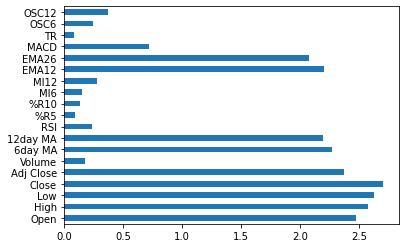

In [6]:
from sklearn.feature_selection import mutual_info_regression
importance=mutual_info_regression(X,Y)
feature_importances=pd.Series(importance,data.columns[0:len(data.columns)-1])
feature_importances.plot(kind="barh")
plt.show()

In [7]:
X=sc.fit_transform(data.drop(['Prediction','OSC12','OSC6','MI12','MI6','Volume','%R10','%R5','RSI'],1))
# Y=np.array(data["Close"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(734, 1, 11) (734, 1) (184, 1, 11) (184, 1)


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_62426/3942108283.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=sc.fit_transform(data.drop(['Prediction','OSC12','OSC6','MI12','MI6','Volume','%R10','%R5','RSI'],1))


In [8]:
model_tech = keras.Sequential()
model_tech.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2]),
    return_sequences=True
    
))
model_tech.add(keras.layers.LSTM(units=64))
model_tech.add(keras.layers.Dense(units=64))
model_tech.add(keras.layers.Dense(units=1))
model_tech.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

Metal device set to: Apple M1 Pro


2022-04-13 19:41:33.964774: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-13 19:41:33.964891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=40, min_delta=0.001)
history_tech=model_tech.fit(
    X_train, y_train,
    epochs=500,
    batch_size=8,
    validation_split=0.1,
    verbose=1,
    shuffle=False,
#     callbacks=[es]
)
y_pred = model_tech.predict(X_test)

Epoch 1/500


2022-04-13 19:41:34.382825: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-13 19:41:35.600200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-13 19:41:35.810665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-13 19:41:35.852206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-13 19:41:35.932496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-13 19:41:36.010259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - ETA: 0s - loss: 3355.0737

2022-04-13 19:41:37.263223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-13 19:41:37.340715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-13 19:41:37.364184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 3s 17ms/step - loss: 3355.0737 - val_loss: 1859.4131
Epoch 2/500
83/83 [==============================] - 1s 10ms/step - loss: 447.3911 - val_loss: 1743.5166
Epoch 3/500
83/83 [==============================] - 1s 9ms/step - loss: 342.4508 - val_loss: 1564.7390
Epoch 4/500
83/83 [==============================] - 1s 9ms/step - loss: 301.7909 - val_loss: 1477.0144
Epoch 5/500
83/83 [==============================] - 1s 9ms/step - loss: 285.3065 - val_loss: 1419.3646
Epoch 6/500
83/83 [==============================] - 1s 10ms/step - loss: 271.3746 - val_loss: 1360.6021
Epoch 7/500
83/83 [==============================] - 1s 10ms/step - loss: 251.1532 - val_loss: 1211.4517
Epoch 8/500
83/83 [==============================] - 1s 9ms/step - loss: 111.9062 - val_loss: 59.7150
Epoch 9/500
83/83 [==============================] - 1s 9ms/step - loss: 20.1457 - val_loss: 121.1157
Epoch 10/500
83/83 [==============================] - 1s 9ms/step - loss: 3

83/83 [==============================] - 1s 12ms/step - loss: 7.1597 - val_loss: 4.3295
Epoch 83/500
83/83 [==============================] - 1s 9ms/step - loss: 7.1433 - val_loss: 4.3193
Epoch 84/500
83/83 [==============================] - 1s 11ms/step - loss: 7.1272 - val_loss: 4.2617
Epoch 85/500
83/83 [==============================] - 1s 11ms/step - loss: 7.1138 - val_loss: 4.1591
Epoch 86/500
83/83 [==============================] - 1s 9ms/step - loss: 7.0992 - val_loss: 3.9895
Epoch 87/500
83/83 [==============================] - 1s 10ms/step - loss: 7.0867 - val_loss: 3.7665
Epoch 88/500
83/83 [==============================] - 1s 10ms/step - loss: 7.0705 - val_loss: 3.4746
Epoch 89/500
83/83 [==============================] - 1s 9ms/step - loss: 7.0547 - val_loss: 3.1482
Epoch 90/500
83/83 [==============================] - 1s 10ms/step - loss: 7.0322 - val_loss: 2.7929
Epoch 91/500
83/83 [==============================] - 1s 9ms/step - loss: 7.0089 - val_loss: 2.4627
Epoch 9

83/83 [==============================] - 1s 9ms/step - loss: 3.0884 - val_loss: 4.2357
Epoch 164/500
83/83 [==============================] - 1s 9ms/step - loss: 2.3577 - val_loss: 2.6009
Epoch 165/500
83/83 [==============================] - 1s 9ms/step - loss: 2.0725 - val_loss: 2.1279
Epoch 166/500
83/83 [==============================] - 1s 10ms/step - loss: 1.7923 - val_loss: 2.4270
Epoch 167/500
83/83 [==============================] - 1s 9ms/step - loss: 1.4738 - val_loss: 3.5189
Epoch 168/500
83/83 [==============================] - 1s 9ms/step - loss: 1.2083 - val_loss: 5.1085
Epoch 169/500
83/83 [==============================] - 1s 9ms/step - loss: 1.2338 - val_loss: 6.4724
Epoch 170/500
83/83 [==============================] - 1s 9ms/step - loss: 1.6507 - val_loss: 7.2599
Epoch 171/500
83/83 [==============================] - 1s 9ms/step - loss: 2.0976 - val_loss: 6.5054
Epoch 172/500
83/83 [==============================] - 1s 10ms/step - loss: 2.6063 - val_loss: 4.3164
Ep

83/83 [==============================] - 1s 12ms/step - loss: 2.4195 - val_loss: 3.8914
Epoch 244/500
83/83 [==============================] - 2s 19ms/step - loss: 2.2743 - val_loss: 1.5933
Epoch 245/500
83/83 [==============================] - 1s 10ms/step - loss: 2.8087 - val_loss: 1.0734
Epoch 246/500
83/83 [==============================] - 2s 23ms/step - loss: 4.1036 - val_loss: 2.0155
Epoch 247/500
83/83 [==============================] - 2s 22ms/step - loss: 5.5513 - val_loss: 5.6260
Epoch 248/500
83/83 [==============================] - 2s 19ms/step - loss: 6.0963 - val_loss: 7.9837
Epoch 249/500
83/83 [==============================] - 1s 11ms/step - loss: 5.3080 - val_loss: 6.2291
Epoch 250/500
83/83 [==============================] - 2s 19ms/step - loss: 4.4365 - val_loss: 2.5180
Epoch 251/500
83/83 [==============================] - 1s 17ms/step - loss: 4.1583 - val_loss: 1.3757
Epoch 252/500
83/83 [==============================] - 2s 18ms/step - loss: 4.1210 - val_loss: 1

83/83 [==============================] - 1s 9ms/step - loss: 2.3509 - val_loss: 1.5104
Epoch 324/500
83/83 [==============================] - 1s 9ms/step - loss: 2.4500 - val_loss: 2.3267
Epoch 325/500
83/83 [==============================] - 1s 9ms/step - loss: 2.8640 - val_loss: 7.5919
Epoch 326/500
83/83 [==============================] - 1s 9ms/step - loss: 3.3244 - val_loss: 5.8002
Epoch 327/500
83/83 [==============================] - 1s 9ms/step - loss: 2.3030 - val_loss: 2.3177
Epoch 328/500
83/83 [==============================] - 1s 9ms/step - loss: 1.7516 - val_loss: 1.8767
Epoch 329/500
83/83 [==============================] - 1s 9ms/step - loss: 2.5652 - val_loss: 1.5166
Epoch 330/500
83/83 [==============================] - 1s 9ms/step - loss: 4.4446 - val_loss: 5.6529
Epoch 331/500
83/83 [==============================] - 1s 9ms/step - loss: 6.4008 - val_loss: 4.9508
Epoch 332/500
83/83 [==============================] - 1s 10ms/step - loss: 3.9797 - val_loss: 3.1994
Epo

83/83 [==============================] - 1s 9ms/step - loss: 3.0493 - val_loss: 3.5624
Epoch 404/500
83/83 [==============================] - 1s 10ms/step - loss: 3.3511 - val_loss: 5.3408
Epoch 405/500
83/83 [==============================] - 1s 9ms/step - loss: 2.7514 - val_loss: 3.2876
Epoch 406/500
83/83 [==============================] - 1s 9ms/step - loss: 2.0291 - val_loss: 2.3857
Epoch 407/500
83/83 [==============================] - 1s 10ms/step - loss: 2.8266 - val_loss: 1.8215
Epoch 408/500
83/83 [==============================] - 1s 9ms/step - loss: 4.7973 - val_loss: 4.5554
Epoch 409/500
83/83 [==============================] - 1s 10ms/step - loss: 6.1938 - val_loss: 5.5109
Epoch 410/500
83/83 [==============================] - 1s 10ms/step - loss: 3.3091 - val_loss: 3.7210
Epoch 411/500
83/83 [==============================] - 1s 11ms/step - loss: 1.9783 - val_loss: 1.8497
Epoch 412/500
83/83 [==============================] - 1s 9ms/step - loss: 1.8831 - val_loss: 3.0798

83/83 [==============================] - 1s 11ms/step - loss: 1.8033 - val_loss: 3.6761
Epoch 484/500
83/83 [==============================] - 1s 10ms/step - loss: 0.9798 - val_loss: 2.3395
Epoch 485/500
83/83 [==============================] - 1s 9ms/step - loss: 0.9873 - val_loss: 7.9247
Epoch 486/500
83/83 [==============================] - 1s 9ms/step - loss: 1.1144 - val_loss: 17.7500
Epoch 487/500
83/83 [==============================] - 1s 9ms/step - loss: 1.5334 - val_loss: 9.5405
Epoch 488/500
83/83 [==============================] - 1s 9ms/step - loss: 2.5371 - val_loss: 5.3307
Epoch 489/500
83/83 [==============================] - 1s 8ms/step - loss: 1.8388 - val_loss: 4.4312
Epoch 490/500
83/83 [==============================] - 1s 10ms/step - loss: 2.2287 - val_loss: 12.5357
Epoch 491/500
83/83 [==============================] - 1s 10ms/step - loss: 2.9922 - val_loss: 6.1150
Epoch 492/500
83/83 [==============================] - 1s 10ms/step - loss: 1.7276 - val_loss: 2.46

2022-04-13 19:49:42.734646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-13 19:49:42.824892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-13 19:49:43.114977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


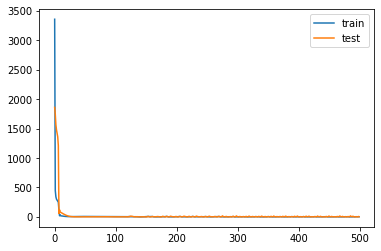

In [10]:
plt.plot(history_tech.history['loss'], label='train')
plt.plot(history_tech.history['val_loss'], label='test')
plt.legend()

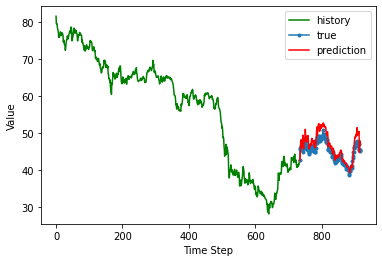

In [11]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

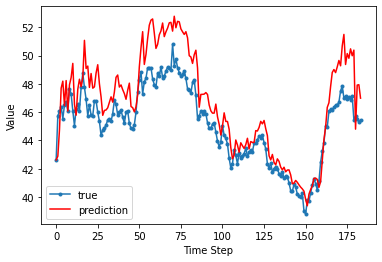

In [12]:
# y_test = sc.inverse_transform(y_test)
# y_pred = sc.inverse_transform(y_pred)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [13]:
r2_score(y_test,y_pred)

0.44920209458327554

In [14]:
mean_absolute_percentage_error(y_test,y_pred)

0.03460482100315071

In [15]:
mean_squared_error(y_test,y_pred,squared=False)

1.9527368462404378

In [16]:
x_val=data_val.drop(['Prediction','OSC12','OSC6','MI12','MI6','Volume','%R10','%R5','RSI'],1)
y_val=data_val['Prediction']
x_val=sc.transform(x_val).reshape(x_val.shape[0],1,x_val.shape[1])
y_val_pred=model_tech.predict(x_val)

/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_62426/3570560286.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_val=data_val.drop(['Prediction','OSC12','OSC6','MI12','MI6','Volume','%R10','%R5','RSI'],1)


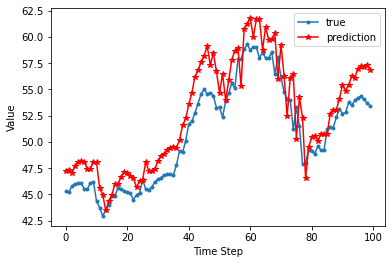

In [17]:
plt.plot(y_val.values, marker='.', label="true")
plt.plot(y_val_pred, 'r', marker='*',label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [18]:
r2_score(y_val,y_val_pred)

0.7586123040115358

In [19]:
mean_absolute_percentage_error(y_val,y_val_pred)

0.0402929062028066

In [20]:
mean_squared_error(y_val.values,y_val_pred,squared=False)

2.3193249882958487